## 七月在线机器学习实训营三期第三周(Pandas数据处理)考试
#### 考试说明:
- 起止时间：请同学在2018年2月9日至2月11日期间完成，最晚提交时间本周日（2月11日24时之前）结束，<b>逾期不接受补考,该考试分数计入平时成绩</b>
- 考试方式：请同学<font color=red><b>拷贝</b></font>该试卷至自己姓名的目录后，将文件更名为同学姓名拼音-exam3后，进行作答。例如wangwei-exam3
- 提交格式：请同学新建自己姓名全拼的文件夹，将该试卷，zip文件等相关考试文件，放置此目录下。将该目录<b>移动</b>至/0.Teacher/Exam/3/目录下
- 注意事项：为确保同学们真正了解自身对本周课程的掌握程度，<font color=red><b>请勿翻阅，移动，更改</b></font>其它同学试卷。如发现按0分处理
- 请同学在下方同学姓名处填写自己的姓名，批改人和最终得分不用填写

- 同学姓名:<u>__李栋栋___</u>  
- 批改人： David
- 最终得分:100

<center><h1>####答卷开始####</h1></center>
<hr>

### Pandas实战题(共七个步骤，每个步骤要求及分数均已标明。总分100分)

1.请将文件student-info.csv中的内容读入pandas DataFrame "df_info"，注意该文件的分隔符是分号，并展示前五行（7.5分）   
请将文件student-score.csv中的内容读入pandas DataFrame "df_score"，注意该文件的分隔符是分号，并展示前五行（7.5分）

In [1]:
import pandas as pd
import numpy as np
df_info = pd.read_csv('../data/student-info.csv',sep=';')
df_info.head(5)

,ID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,yes,no,no,4,3,4,1,1,3,6
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,yes,yes,no,5,3,3,1,1,3,4
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,yes,yes,no,4,3,2,2,3,3,10
3,3,GP,F,15,U,GT3,T,4,2,health,...,yes,yes,yes,3,2,2,1,1,5,2
4,4,GP,F,16,U,GT3,T,3,3,other,...,yes,no,no,4,3,2,1,2,5,4


In [2]:
df_score = pd.read_csv('../data/student-score.csv',sep=';')
df_score.head(5)

,ID,G1,G2,G3
0,0,5,6,6
1,1,5,5,6
2,2,7,8,10
3,3,15,14,15
4,4,6,10,10


2.把两个DataFrame "df_info" 和 "df_score" 按照学生ID对齐拼接起来，结果存在一个新DataFrame "df" 中 (10分）

***
好像没指定是什么类型的merge，最好指定下，加深去merge的理解 

In [3]:
df = df_info.merge(df_score,on='ID')
df.head()

,ID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
3,3,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,4,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10


3.把"df"所有的列展示出来(5分)

In [4]:
df.columns

Index(['ID', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

4.统计男生的平均分和女生的平均分(G1, G2, G3)，使用groupby和aggregate来操作(10分)

In [5]:
sex_avg = df.loc[:,['sex','G1','G2','G3']].groupby('sex').aggregate(np.mean)
sex_avg

,G1,G2,G3
sex,,,
F,10.620192,10.389423,9.966346
M,11.229947,11.074866,10.914439


5.统计不同年龄的学生(G1, G2, G3)的平均分，并作出柱状图展示（10分）

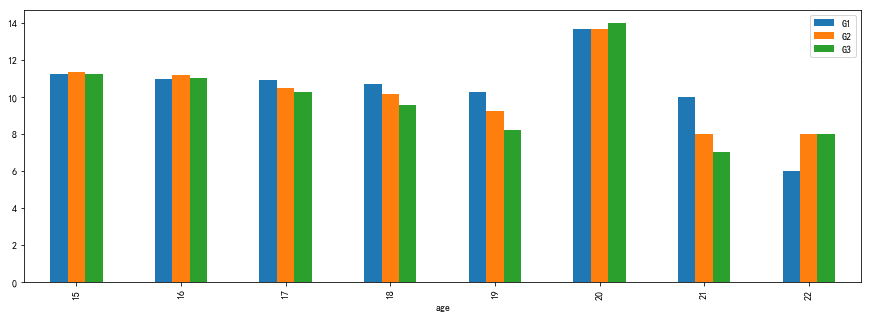

In [6]:
%matplotlib inline
age_avg = df.loc[:,['age','G1','G2','G3']].groupby('age').aggregate(np.mean)
age_avg.plot(kind='bar',figsize=(15,5))

6.统计不同学校(school一列)的学生的平均分，并作柱状图展示，要求同一科目的两个学校成绩贴在一起展示(10分）

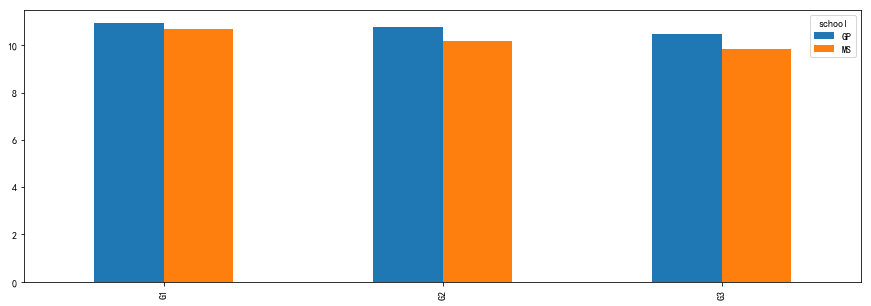

In [7]:
school_avg = df.loc[:,['school','G1','G2','G3']].groupby('school').aggregate(np.mean)
school_avg.T.plot(kind='bar',figsize=(15,5),)

7.统计一下每个学校三个科目总分的前十名，然后把前十名的同学所有信息输出(40分)

In [8]:
df['score_sum'] = df['G1']+df['G2']+df['G3']
school_10name = df.groupby('school').apply(lambda x:x.nlargest(10,columns='score_sum'))
school_10name

ID school sex  age address famsize Pstatus  Medu  Fedu      Mjob  \
school                                                                          
GP     47    47     GP   M   16       U     GT3       T     4     3    health   
       110  110     GP   M   15       U     LE3       A     4     4   teacher   
       113  113     GP   M   15       U     LE3       T     4     2   teacher   
       42    42     GP   M   15       U     GT3       T     4     4  services   
       286  286     GP   F   18       U     GT3       T     2     2   at_home   
       129  129     GP   M   16       R     GT3       T     4     4   teacher   
       198  198     GP   F   17       U     GT3       T     4     4  services   
       245  245     GP   M   16       U     GT3       T     2     1     other   
       293  293     GP   F   17       R     LE3       T     3     1  services   
       8      8     GP   M   15       U     LE3       A     3     2  services   
MS     374  374     MS   F   18       R     LE3       T     4     4     other   
       359  359     MS   F   18       U     LE3       T     1     1   at_home   
       363  363     MS   F   17       U     LE3       T     4     4   at_home   
       391  391     MS   M   17       U     LE3       T     3     1  services   
       378  378     MS   F   18       U     GT3       T     3     3     other   
       376  376     MS   F   20       U     GT3       T     4     2    health   
       380  380     MS   M   18       U     GT3       T     4     4   teacher   
       351  351     MS   M   17       U     GT3       T     3     3    health   
       360  360     MS   F   18       R     LE3       A     1     4   at_home   
       366  366     MS   M   18       U     LE3       T     4     4   teacher   

              ...    freetime goout Dalc  Walc  health  absences  G1  G2  G3  \
school        ...                                                              
GP     47     ...           2     2    1     1       2         4  19  19  20   
       110    ...           5     3    1     1       4         6  18  19  19   
       113    ...           5     2    1     1       3        10  18  19  19   
       42     ...           3     3    1     1       5         2  19  18  18   
       286    ...           3     3    1     2       2         5  18  18  19   
       129    ...           5     5    2     5       4         8  18  18  18   
       198    ...           2     4    2     3       2        24  18  18  18   
       245    ...           3     3    1     1       4         6  18  18  18   
       293    ...           1     2    1     1       3         6  18  18  18   
       8      ...           2     2    1     1       1         0  16  18  19   
MS     374    ...           4     4    1     1       1         0  19  18  19   
       359    ...           3     2    1     1       4         0  18  16  16   
       363    ...           3     4    1     1       1         0  16  15  15   
       391    ...           4     5    3     4       2         3  14  16  16   
       378    ...           1     3    1     2       1         0  15  15  15   
       376    ...           4     3    1     1       3         4  15  14  15   
       380    ...           2     4    1     4       2         4  15  14  14   
       351    ...           5     4    2     3       3         2  13  13  13   
       360    ...           3     4    1     4       5         0  13  13  13   
       366    ...           2     2    2     2       5         0  13  13  13   

           score_sum  
school                
GP     47         58  
       110        56  
       113        56  
       42         55  
       286        55  
       129        54  
       198        54  
       245        54  
       293        54  
       8          53  
MS     374        56  
       359        50  
       363        46  
       391        46  
       378        45  
       376        44  
       380        43  
       351        39  
       36

### 本阶段课程意见反馈题(10分送分项，非必答)
- 请同学围绕以下两点进行回答：
- 自身总结：请您对您自己在本周课程的学习，收获，技能掌握等方面进行一次总结 ，也包括有哪些方面存在哪些不足，欠缺，困惑。作为将来回顾学习路径时的依据。



自身总结：在学习期间感觉自己成长的挺快，但是学习的时候有很多知识点掌握的还不够熟练，面对实际问题的时候总是有些犹豫，需要一些联系来
巩固所学的知识

- 课程反馈：请就知识点，进度，难易度，教学方式，考试方式及难易度等方面向我们反馈，督促我们进行更有效的改进。

课程反馈：课程学习感觉进度各个方面比较合理，每次学完以后都有一两天的时间来进行在线答疑和巩固，这一块感觉学习到了较多知识

<hr>
<center><h1>####答卷结束####</h1></center>